In [50]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report#模型评估
%matplotlib inline
plt.style.use('seaborn-whitegrid')
from sklearn import preprocessing
#数据是否需要标准化
scale=False

In [51]:
data=pd.read_csv('LR-testSet.csv',header=None)

data=data.values
x_data=data[:,:-1]
y_data=data[:,-1]
print(x_data)
print(y_data)
print(y_data.shape)

[[-1.7612000e-02  1.4053064e+01]
 [-1.3956340e+00  4.6625410e+00]
 [-7.5215700e-01  6.5386200e+00]
 [-1.3223710e+00  7.1528530e+00]
 [ 4.2336300e-01  1.1054677e+01]
 [ 4.0670400e-01  7.0673350e+00]
 [ 6.6739400e-01  1.2741452e+01]
 [-2.4601500e+00  6.8668050e+00]
 [ 5.6941100e-01  9.5487550e+00]
 [-2.6632000e-02  1.0427743e+01]
 [ 8.5043300e-01  6.9203340e+00]
 [ 1.3471830e+00  1.3175500e+01]
 [ 1.1768130e+00  3.1670200e+00]
 [-1.7818710e+00  9.0979530e+00]
 [-5.6660600e-01  5.7490030e+00]
 [ 9.3163500e-01  1.5895050e+00]
 [-2.4205000e-02  6.1518230e+00]
 [-3.6453000e-02  2.6909880e+00]
 [-1.9694900e-01  4.4416500e-01]
 [ 1.0144590e+00  5.7543990e+00]
 [ 1.9852980e+00  3.2306190e+00]
 [-1.6934530e+00 -5.5754000e-01]
 [-5.7652500e-01  1.1778922e+01]
 [-3.4681100e-01 -1.6787300e+00]
 [-2.1244840e+00  2.6724710e+00]
 [ 1.2179160e+00  9.5970150e+00]
 [-7.3392800e-01  9.0986870e+00]
 [-3.6420010e+00 -1.6180870e+00]
 [ 3.1598500e-01  3.5239530e+00]
 [ 1.4166140e+00  9.6192320e+00]
 [-3.86323

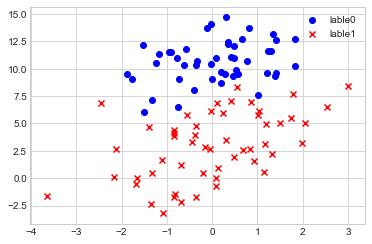

In [52]:
#画图
def plot():
    x0=[]
    x1=[]
    y0=[]
    y1=[]
    for i in range(len(x_data)):
        if y_data[i]==0:
            x0.append(x_data[i,0])
            y0.append(x_data[i,1])
        else:
            x1.append(x_data[i,0])
            y1.append(x_data[i,1])
    scatter0=plt.scatter(x0,y0,c='b',marker='o')
    scatter1=plt.scatter(x1,y1,c='r',marker='x')
    plt.legend(handles=[scatter0,scatter1],labels=['lable0','lable1'],loc='best')
            
plot()

In [53]:
print(y_data.shape)
y_data=y_data[:,np.newaxis]
print(np.mat(x_data).shape)
print(np.mat(y_data).shape)
X_data=np.concatenate((np.ones((100,1)),x_data),axis=1)
print(X_data.shape)

(100,)
(100, 2)
(100, 1)
(100, 3)


In [54]:
def sigmoid(x):
    return 1.0/(1+np.exp(-x))

def cost(xMat, yMat, ws):
    left = np.multiply(yMat, np.log(sigmoid(xMat*ws)))
    right = np.multiply(1 - yMat, np.log(1 - sigmoid(xMat*ws)))
    return np.sum(left + right) / -(len(xMat))

def gradAscent(xArr, yArr):
    
    if scale == True:
        xArr = preprocessing.scale(xArr)
    xMat = np.mat(xArr)
    yMat = np.mat(yArr)
    
    lr = 0.001
    epochs = 10000
    costList = []
    # 计算数据行列数
    # 行代表数据个数，列代表权值个数
    m,n = np.shape(xMat)
    # 初始化权值
    ws = np.mat(np.ones((n,1)))
    
    for i in range(epochs+1):             
        # xMat和weights矩阵相乘
        h = sigmoid(xMat*ws)   
        # 计算误差
        ws_grad = xMat.T*(h - yMat)/m
        ws = ws - lr*ws_grad 
        
        if i % 50 == 0:
            costList.append(cost(xMat,yMat,ws))
    return ws,costList

In [55]:
ws,costList=gradAscent(X_data,y_data)
print(ws)

[[ 2.05836354]
 [ 0.3510579 ]
 [-0.36341304]]


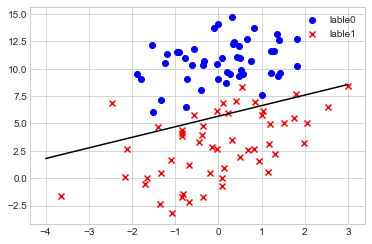

In [58]:
#决策边界
if scale==False:
    plot()
    x_test=[[-4],[3]]
    #w0+x1w1+x2w2=0求解x2
    y_test=(-ws[0]-x_test*ws[1])/ws[2]
    plt.plot(x_test,y_test,'k')
    


Text(0,0.5,'cost')

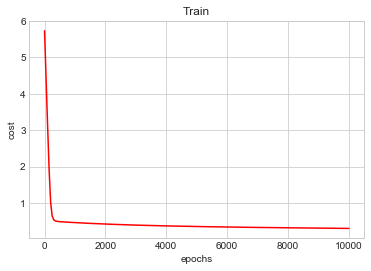

In [57]:
#画loss值变化
x=np.linspace(0,10000,201)
plt.plot(x,costList,c='r')
plt.title("Train")
plt.xlabel('epochs')
plt.ylabel('cost')



In [61]:
#预测
def predict(x_data,ws):
    if scale==True:
        x_data=preprocessing.scale(x_data)
    xMat=np.mat(x_data)
    ws=np.mat(ws)
    return [1 if x>=0.5 else 0 for x in sigmoid(xMat*ws)]
predictions=predict(X_data,ws)
print(classification_report(y_data,predictions))

             precision    recall  f1-score   support

        0.0       0.82      1.00      0.90        47
        1.0       1.00      0.81      0.90        53

avg / total       0.92      0.90      0.90       100

